In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price/laptop_price.csv


In [3]:
df = pd.read_csv('/kaggle/input/laptop-price/laptop_price.csv',encoding='latin1')

In [4]:
df.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df_copy = df.copy()

In [6]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [7]:
df.shape

(1303, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


NO NULL VALUES

In [9]:
null_values = df.isnull()

# Display the DataFrame with null value indicators
print(null_values)

      laptop_ID  Company  Product  TypeName  Inches  ScreenResolution    Cpu  \
0         False    False    False     False   False             False  False   
1         False    False    False     False   False             False  False   
2         False    False    False     False   False             False  False   
3         False    False    False     False   False             False  False   
4         False    False    False     False   False             False  False   
...         ...      ...      ...       ...     ...               ...    ...   
1298      False    False    False     False   False             False  False   
1299      False    False    False     False   False             False  False   
1300      False    False    False     False   False             False  False   
1301      False    False    False     False   False             False  False   
1302      False    False    False     False   False             False  False   

        Ram  Memory    Gpu  OpSys  Weig

In [10]:
df.duplicated().sum()

0

**removing gb and kg**

In [11]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype('int32')

df['Weight'] = df['Weight'].str.replace('kg', '').astype('float32')

In [12]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [13]:

df['price'] = (df['Price_euros'] * 91.25).astype(int)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,122246
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,82028
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,52468
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,231542
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,164578


/tmp/ipykernel_33/3127329296.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

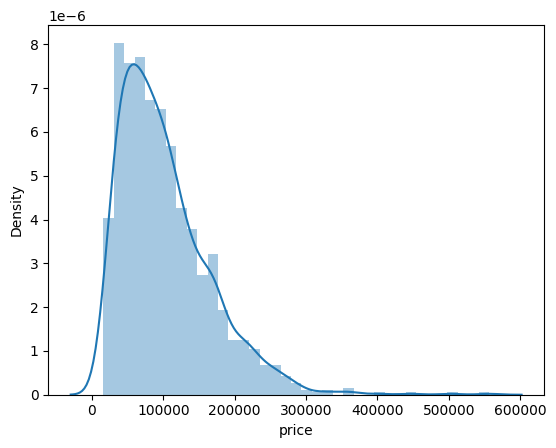

In [14]:
import seaborn as sns
sns.distplot(df['price'])

<Axes: xlabel='Company'>

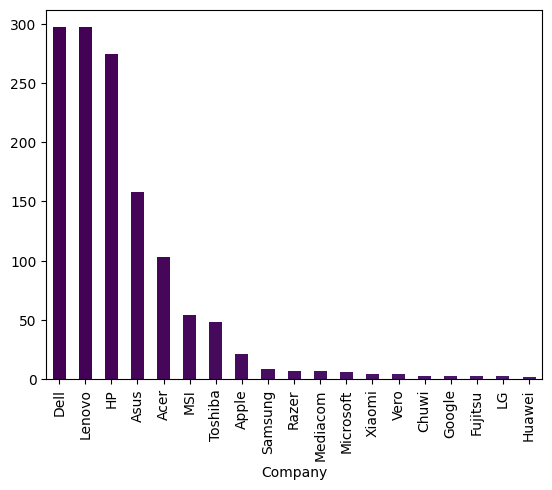

In [15]:
company_count = df['Company'].value_counts()
colors = plt.cm.viridis(range(len(company_count)))
df['Company'].value_counts().plot(kind='bar',color = colors)

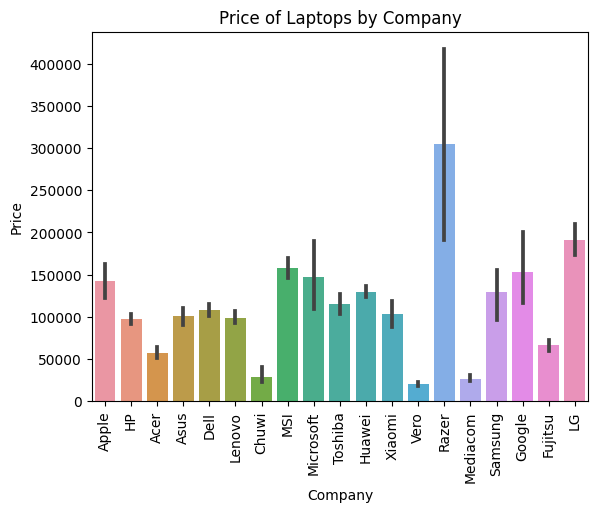

In [16]:


import seaborn as sns

# Assuming df['Company'] is categorical and df['price'] is numerical
sns.barplot(x='Company', y='price', data=df)
plt.xlabel('Company')
plt.ylabel('Price')
plt.title('Price of Laptops by Company')
plt.xticks(rotation=90)  
plt.show()


<Axes: xlabel='TypeName'>

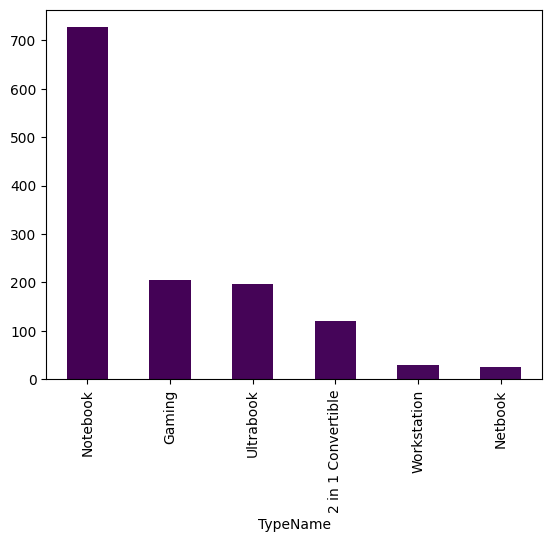

In [17]:
typeco = df['TypeName'].value_counts()
colors = plt.cm.viridis(range(len(typeco)))
typeco.plot(kind='bar',color = colors)

In [18]:
df['Product'].value_counts()

Product
XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: count, Length: 618, dtype: int64

In [19]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [20]:
df['touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [21]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,price,touchscreen
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,122246,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,82028,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,52468,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,231542,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,164578,0


<Axes: xlabel='touchscreen'>

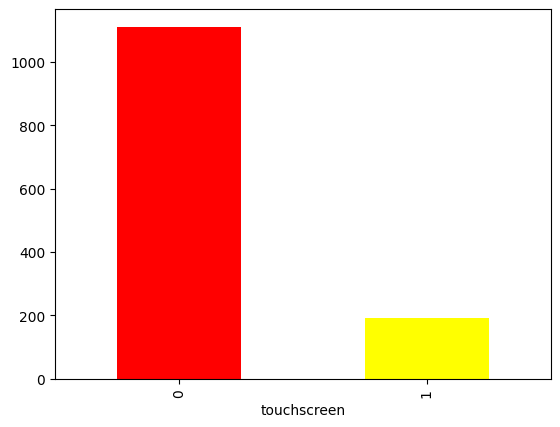

In [22]:
colors = ['red','yellow']
df['touchscreen'].value_counts().plot(kind = "bar",color = colors)

In [23]:
df['IPS Panel'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

<Axes: xlabel='IPS Panel'>

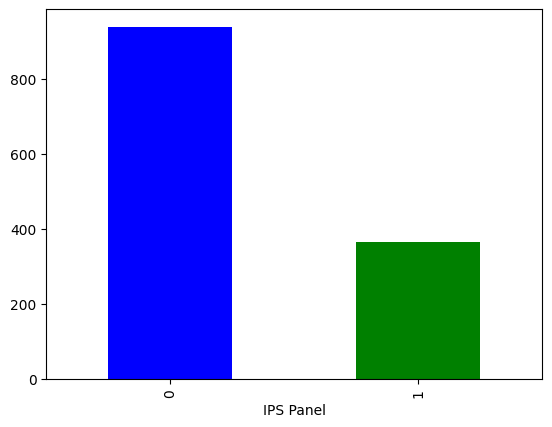

In [24]:
colors = ['blue','green']
df['IPS Panel'].value_counts().plot(kind = "bar",color = colors)

In [25]:
df['Full HD'] = df['ScreenResolution'].apply(lambda x:1 if 'Full HD' in x else 0)

<Axes: xlabel='Full HD'>

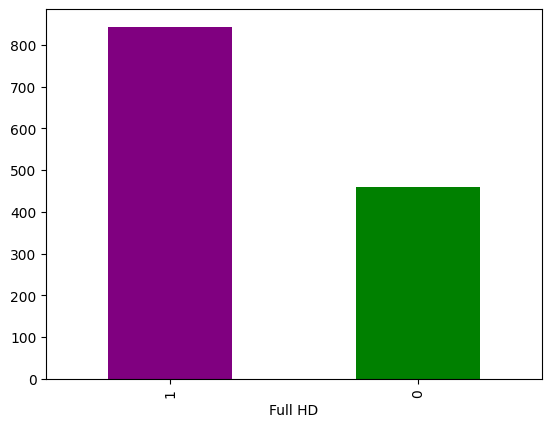

In [26]:
colors = ['purple','green']
df['Full HD'].value_counts().plot(kind = "bar",color = colors)

In [27]:
df['Quad HD+'] = df['ScreenResolution'].apply(lambda x:1 if 'Quad HD+' in x else 0)

<Axes: xlabel='Quad HD+'>

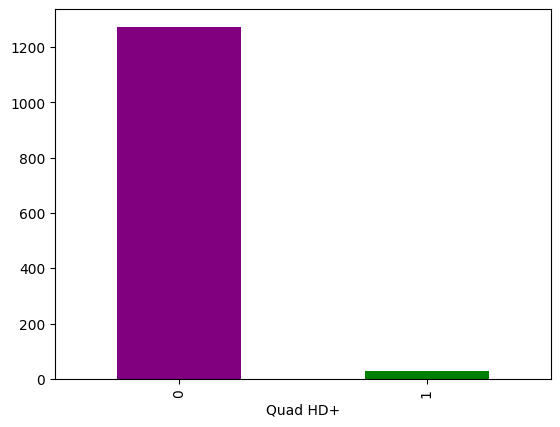

In [28]:
colors = ['purple','green']
df['Quad HD+'].value_counts().plot(kind = "bar",color = colors)

In [29]:
df[['width', 'height']] = df['ScreenResolution'].str.split('x', expand=True)

In [30]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,price,touchscreen,IPS Panel,Full HD,Quad HD+,width,height
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,122246,0,1,0,0,IPS Panel Retina Display 2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,82028,0,0,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,52468,0,0,1,0,Full HD 1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,231542,0,1,0,0,IPS Panel Retina Display 2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,164578,0,1,0,0,IPS Panel Retina Display 2560,1600


In [31]:
# Extracting  numeric values from the 'description' column
df['width'] = df['width'].astype(str)
df['width'] = df['width'].str.extract('(\d+)').astype(int)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,price,touchscreen,IPS Panel,Full HD,Quad HD+,width,height
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,122246,0,1,0,0,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,82028,0,0,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,52468,0,0,1,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,231542,0,1,0,0,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,164578,0,1,0,0,2560,1600


In [32]:
df['width'].astype(int)
df['height'].astype(int)
df.drop('Price_euros',axis = 1,inplace = True)

In [33]:
df['price'].round().astype(int)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,touchscreen,IPS Panel,Full HD,Quad HD+,width,height
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,122246,0,1,0,0,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,82028,0,0,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,52468,0,0,1,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,231542,0,1,0,0,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,164578,0,1,0,0,2560,1600


In [34]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'price', 'touchscreen', 'IPS Panel', 'Full HD', 'Quad HD+', 'width',
       'height'],
      dtype='object')

In [35]:
# df.drop('ScreenResolution',axis = 1,inplace = True)

In [36]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [37]:
df.sample(20)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,touchscreen,IPS Panel,Full HD,Quad HD+,width,height
153,156,MSI,GE73VR 7RE,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.80,172462,0,0,1,0,1920,1080
534,541,Asus,ROG Strix,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.30,150471,0,1,1,0,1920,1080
392,399,Acer,Aspire 5,Notebook,15.6,IPS Panel 1366x768,Intel Core i5 8250U 1.6GHz,12,1TB HDD,Nvidia GeForce MX130,Windows 10,2.20,63326,0,1,0,0,1366,768
101,104,HP,15-bw000nv (E2-9000e/4GB/500GB/Radeon,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,Windows 10,2.10,31846,0,0,1,0,1920,1080
422,429,HP,ProBook 650,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8,256GB SSD,Intel HD Graphics 630,Windows 10,2.31,130213,0,0,1,0,1920,1080
631,639,Dell,Inspiron 7567,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,134958,0,0,1,0,1920,1080
930,944,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.20,28196,0,0,0,0,1366,768
1017,1031,Lenovo,ThinkPad P70,Notebook,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6820HQ 2.7GHz,16,512GB SSD,Nvidia Quadro 3000M,Windows 7,2.40,270830,0,1,0,0,4,2160
531,538,Toshiba,Satellite Pro,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,500GB HDD,Intel HD Graphics 620,Windows 10,2.00,78475,0,1,1,0,1920,1080
167,171,Dell,Inspiron 5577,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.56,96769,0,0,1,0,1920,1080


In [38]:
df['i5'] = df['Cpu'].apply(lambda x:1 if 'i5' in x else 0)

<Axes: xlabel='i5', ylabel='count'>

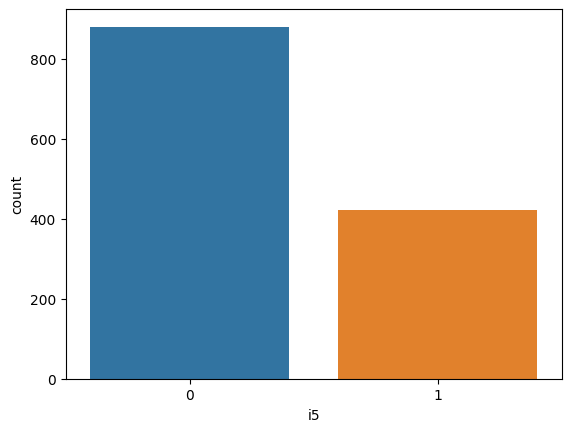

In [39]:
sns.countplot(x='i5', data=df)

In [40]:
df['i7'] = df['Cpu'].apply(lambda x:1 if 'i7' in x else 0)

<Axes: xlabel='i7', ylabel='count'>

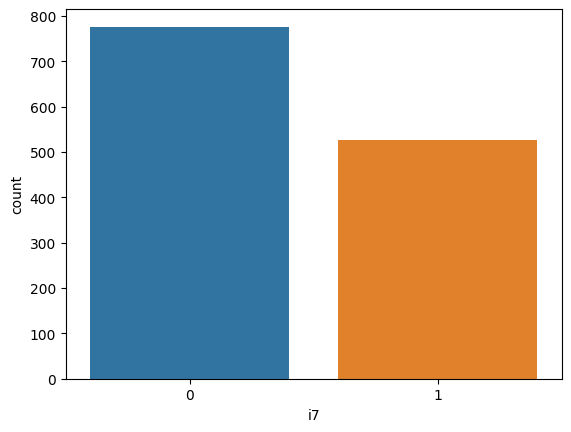

In [41]:
sns.countplot(x='i7', data=df)

In [42]:
df['i3'] = df['Cpu'].apply(lambda x:1 if 'i3' in x else 0)

<Axes: xlabel='i3', ylabel='count'>

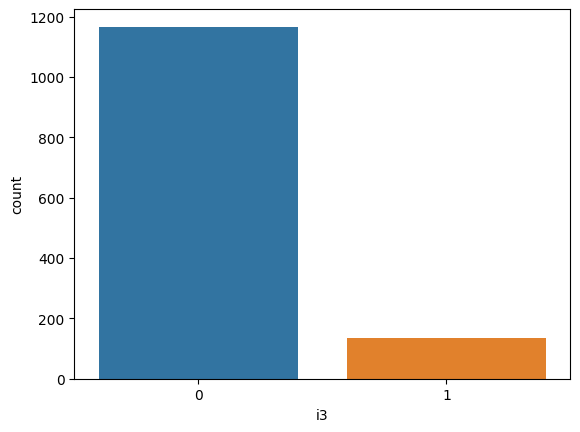

In [43]:
sns.countplot(x='i3', data=df)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int32  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float32
 12  price             1303 non-null   int64  
 13  touchscreen       1303 non-null   int64  
 14  IPS Panel         1303 non-null   int64  
 15  Full HD           1303 non-null   int64  
 16  Quad HD+          1303 non-null   int64  


In [45]:
df.drop('laptop_ID',axis = 1)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,price,touchscreen,IPS Panel,Full HD,Quad HD+,width,height,i5,i7,i3
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,122246,0,1,0,0,2560,1600,1,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,82028,0,0,0,0,1440,900,1,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,...,52468,0,0,1,0,1920,1080,1,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,...,231542,0,1,0,0,2880,1800,0,1,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,164578,0,1,0,0,2560,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,...,58217,1,1,1,0,1920,1080,0,1,0
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,...,136783,1,1,0,1,3200,1800,0,1,0
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,...,20896,0,0,0,0,1366,768,0,0,0
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,...,69715,0,0,0,0,1366,768,0,1,0


In [46]:
df['height'] = df['height'].astype(int)
df['height'].info

<bound method Series.info of 0       1600
1        900
2       1080
3       1800
4       1600
        ... 
1298    1080
1299    1800
1300     768
1301     768
1302     768
Name: height, Length: 1303, dtype: int64>

In [47]:
# calculating pixels per inch
df['height'].astype(int)
df['ppi'] = (df['width']**2 + df['height']**2)**0.5/df['Inches']

In [48]:
df['other'] = df['Cpu'].apply(lambda x: 1 if not any(keyword in x for keyword in ['i3', 'i5', 'i7','AMD']) else 0)

# Creating the 'amd' column
df['amd'] = df['Cpu'].apply(lambda x: 1 if 'AMD' in x else 0)


In [49]:
df.sample(8)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Full HD,Quad HD+,width,height,i5,i7,i3,ppi,other,amd
47,48,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1700 3GHz,8,256GB SSD + 1TB HDD,AMD Radeon RX 580,...,1,0,1920,1080,0,0,0,127.335675,0,1
246,251,HP,15-bs015dx (i5-7200U/8GB/1TB/W10),Notebook,15.6,Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,...,0,0,1366,768,1,0,0,100.454670,0,0
36,37,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 7130U 2.7GHz,4,1TB HDD,Intel HD Graphics 620,...,0,0,1366,768,0,0,1,100.454670,0,0
900,912,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7Y75 1.3GHz,8,512GB SSD,Intel HD Graphics 615,...,0,1,3200,1800,0,1,0,276.053530,0,0
258,263,MSI,GT73EVR 7RE,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,...,1,0,1920,1080,0,1,0,127.335675,0,0
1247,1265,Asus,Rog GL502VS,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,...,1,0,1920,1080,0,1,0,141.211998,0,0
955,969,Dell,Alienware 17,Gaming,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,...,0,0,4,2160,0,1,0,124.855705,0,0
560,567,Acer,Spin SP111-31,2 in 1 Convertible,11.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Celeron Dual Core N3350 2.0GHz,4,32GB Flash Storage,Intel HD Graphics 500,...,1,0,1920,1080,0,0,0,189.905791,1,0


In [50]:
df2 = pd.DataFrame([df['i3'],df['i5'],df['i7'],df['amd'],df['other']])

In [51]:
# def get_cpu_brand(row):
#     if row['i3'] == 1:
#         return 'i3'
#     elif row['i5'] == 1:
#         return 'i5'
#     elif row['i7'] == 1:
#         return 'i7'
#     elif row['amd'] == 1:
#         return 'AMD'
#     else:
#         return 'Other'

# df2['CPU BRAND'] = df2.apply(get_cpu_brand, axis=1)
# df = df[['CPU BRAND']]

# # Creating a count plot
# sns.countplot(x='CPU BRAND', data=df2)
df['other'].value_counts()

other
0    1148
1     155
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


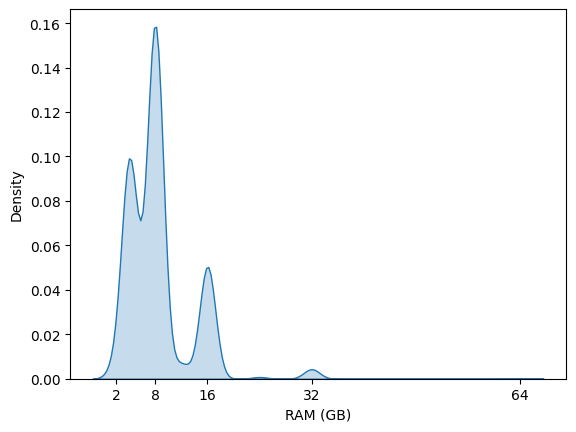

In [52]:
# kde plot
sns.kdeplot(df['Ram'], fill=True)
plt.xticks(ticks=[2,8, 16, 32, 64])
plt.xlabel('RAM (GB)')
plt.ylabel('Density')
plt.show()


In [53]:
columns_drop = ['laptop_ID','ScreenResolution','Cpu']
df = df.drop(columns_drop,axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   Product      1303 non-null   object 
 2   TypeName     1303 non-null   object 
 3   Inches       1303 non-null   float64
 4   Ram          1303 non-null   int32  
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   float32
 9   price        1303 non-null   int64  
 10  touchscreen  1303 non-null   int64  
 11  IPS Panel    1303 non-null   int64  
 12  Full HD      1303 non-null   int64  
 13  Quad HD+     1303 non-null   int64  
 14  width        1303 non-null   int64  
 15  height       1303 non-null   int64  
 16  i5           1303 non-null   int64  
 17  i7           1303 non-null   int64  
 18  i3           1303 non-null   int64  
 19  ppi   

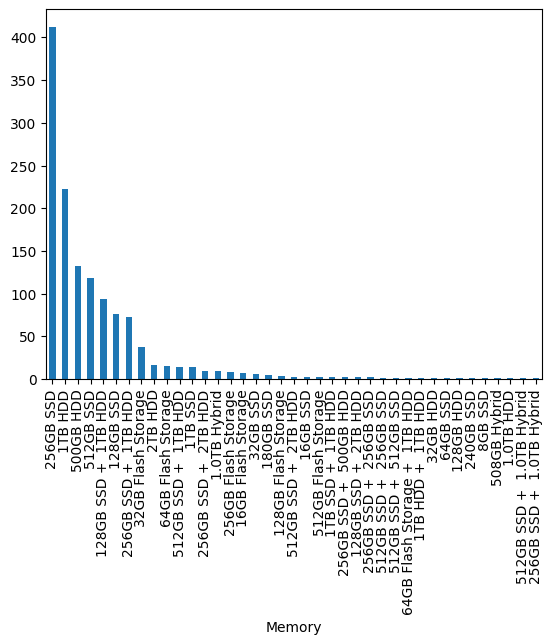

In [54]:
 plt  = df['Memory'].value_counts().plot(kind = 'bar')


<Axes: xlabel='Inches', ylabel='price'>

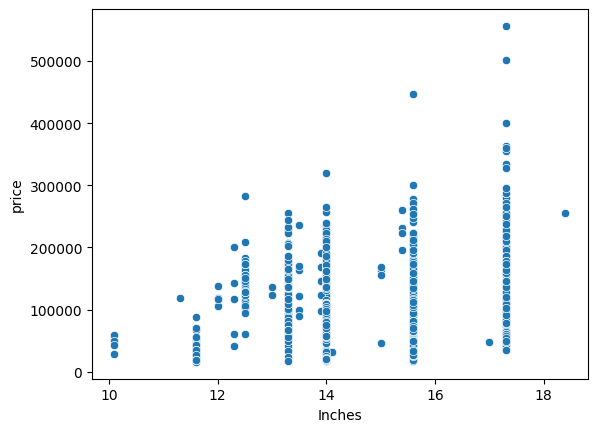

In [55]:
sns.scatterplot(x=df['Inches'],y=df['price'])

In [56]:
df.sample(8
         )


,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,price,...,Full HD,Quad HD+,width,height,i5,i7,i3,ppi,other,amd
1056,HP,250 G5,Notebook,15.6,4,500GB HDD,Intel HD Graphics 620,No OS,1.96,45533,...,0,0,1366,768,1,0,0,100.454670,0,0
1098,HP,250 G5,Notebook,15.6,4,1TB HDD,Intel HD Graphics 405,Windows 10,1.96,45625,...,0,0,1366,768,0,0,0,100.454670,1,0
269,Lenovo,V330-15IKB (i7-8550U/8GB/256GB/FHD/W10),Notebook,15.6,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.05,80300,...,1,0,1920,1080,0,1,0,141.211998,0,0
1109,Asus,Rog GL552VW-CN470T,Gaming,15.6,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.59,122183,...,1,0,1920,1080,0,1,0,141.211998,0,0
623,Fujitsu,LifeBook A557,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.20,72908,...,0,0,1366,768,1,0,0,100.454670,0,0
963,Toshiba,Portege X20W-D-10V,Ultrabook,12.5,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.10,163337,...,1,0,1920,1080,0,1,0,176.232574,0,0
382,Asus,ROG Strix,Gaming,15.6,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.30,151018,...,1,0,1920,1080,0,1,0,141.211998,0,0
1218,Lenovo,IdeaPad Y700-15ISK,Gaming,15.6,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.60,116070,...,1,0,1920,1080,0,1,0,141.211998,0,0


In [57]:
# Step 1: Convert 'Memory' to string and remove '.0'
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

# Step 2: Remove 'GB' and replace 'TB' with '000'
df["Memory"] = df["Memory"].str.replace('GB', '', regex=False)
df["Memory"] = df["Memory"].str.replace('TB', '000', regex=False)

# Step 3: Split 'Memory' into two parts based on '+'
new = df["Memory"].str.split("+", n=1, expand=True)

# Step 4: Assign first part to 'first' and strip spaces
df["first"] = new[0].str.strip()

# Step 5: Assign second part to 'second' and fill NaN with "0"
df["second"] = new[1].fillna("0").str.strip()

# Step 6: Create indicators for storage types in 'first'
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Step 7: Remove non-numeric characters from 'first'
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# Step 8: Create indicators for storage types in 'second'
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Step 9: Remove non-numeric characters from 'second'
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Step 10: Convert 'first' and 'second' to integers, handle empty strings
df["first"] = df["first"].apply(lambda x: int(x) if x else 0)
df["second"] = df["second"].apply(lambda x: int(x) if x else 0)

# Step 11: Calculate total storage for each type
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

# Step 12: Drop intermediate columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'], inplace=True)

# Display the final DataFrame
df.sample(9)



,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,price,...,i5,i7,i3,ppi,other,amd,HDD,SSD,Hybrid,Flash_Storage
778,Razer,Blade Pro,Gaming,14.0,16,512 SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,264533,...,0,1,0,157.350512,0,0,0,512,0,0
176,Acer,Aspire A315-51,Notebook,15.6,4,128 SSD,Intel HD Graphics 520,Windows 10,2.10,40971,...,0,0,1,100.454670,0,0,0,128,0,0
942,Acer,TravelMate P259-G2,Notebook,15.6,4,500 HDD,Intel HD Graphics 620,Windows 10,2.23,56483,...,1,0,0,100.454670,0,0,500,0,0,0
321,Lenovo,IdeaPad 320-17IKB,Notebook,17.3,4,1000 HDD,Nvidia GeForce 920MX,Windows 10,2.79,53746,...,1,0,0,106.113062,0,0,1000,0,0,0
1118,Toshiba,Portege X30-D-10K,Ultrabook,13.3,16,512 SSD,Intel HD Graphics 620,Windows 10,1.05,203122,...,0,1,0,165.632118,0,0,0,512,0,0
872,Toshiba,Tecra A50-D-11D,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,Windows 10,2.00,126655,...,0,1,0,141.211998,0,0,0,256,0,0
995,Asus,ZenBook UX310UA-FB485T,Notebook,13.3,8,256 SSD,Intel HD Graphics 620,Windows 10,1.40,104937,...,1,0,0,276.053530,0,0,0,256,0,0
68,Lenovo,V310-15ISK (i5-7200U/4GB/1TB/FHD/W10),Notebook,15.6,4,1000 HDD,Intel HD Graphics 620,Windows 10,1.90,50096,...,1,0,0,141.211998,0,0,1000,0,0,0
1136,HP,ZBook 17,Workstation,17.3,8,256 SSD,Nvidia Quadro M3000M,Windows 7,3.00,360382,...,0,1,0,127.335675,0,0,0,256,0,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   Product        1303 non-null   object 
 2   TypeName       1303 non-null   object 
 3   Inches         1303 non-null   float64
 4   Ram            1303 non-null   int32  
 5   Memory         1303 non-null   object 
 6   Gpu            1303 non-null   object 
 7   OpSys          1303 non-null   object 
 8   Weight         1303 non-null   float32
 9   price          1303 non-null   int64  
 10  touchscreen    1303 non-null   int64  
 11  IPS Panel      1303 non-null   int64  
 12  Full HD        1303 non-null   int64  
 13  Quad HD+       1303 non-null   int64  
 14  width          1303 non-null   int64  
 15  height         1303 non-null   int64  
 16  i5             1303 non-null   int64  
 17  i7             1303 non-null   int64  
 18  i3      

In [59]:
df = df.drop('Memory',axis = 1)

In [60]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [61]:
df = df[df['OpSys'] != 'Android']

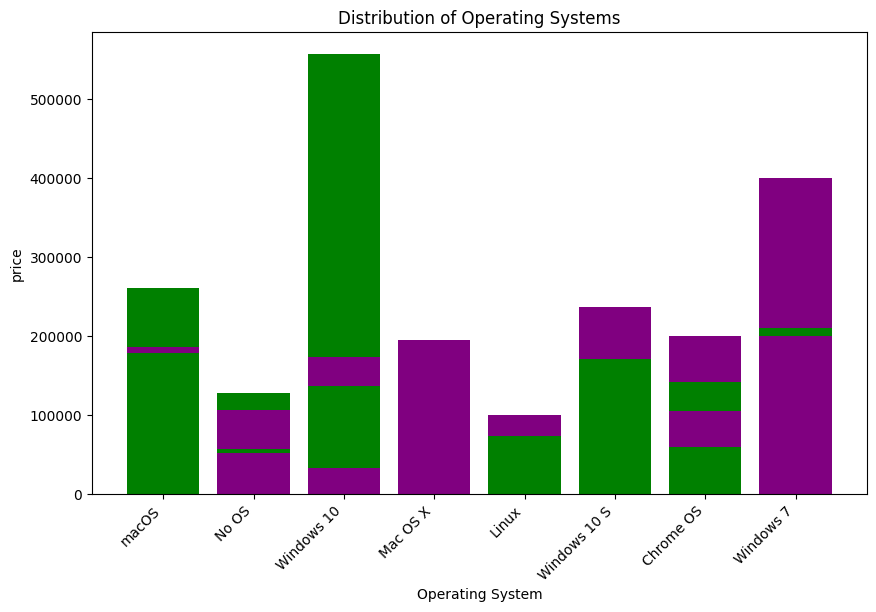

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
color = ['red','yellow','green']
plt.bar(df['OpSys'], df['price'], color= colors)
plt.xlabel('Operating System')
plt.ylabel('price')
plt.title('Distribution of Operating Systems')
plt.xticks(rotation=45, ha='right')
plt.show()

In [63]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [64]:
Gtx_df = df[df['Gpu'].str.contains('GTX', case=False, na=False)]

# Display the filtered DataFrame
print(Gtx_df)

     Company                                    Product   TypeName  Inches  \
21    Lenovo                         Legion Y520-15IKBN     Gaming    15.6   
41      Dell                              Inspiron 7577     Gaming    15.6   
58       MSI                                 GS73VR 7RG     Gaming    17.3   
65      Asus                                ZenBook Pro  Ultrabook    15.6   
69      Asus  FX753VE-GC093 (i7-7700HQ/12GB/1TB/GeForce     Gaming    17.3   
...      ...                                        ...        ...     ...   
1256    Asus                          Rog G752VT-GC073T     Gaming    17.3   
1259     MSI                                GE62 Apache     Gaming    15.6   
1265  Lenovo                         IdeaPad Y700-15ISK   Notebook    15.6   
1279  Lenovo                         IdeaPad Y700-15ISK   Notebook    15.6   
1293  Lenovo                         IdeaPad Y700-15ISK   Notebook    15.6   

      Ram                         Gpu       OpSys  Weight   pri

In [65]:

df['GPUTYPE'] = df['Gpu'].apply(lambda x: 'AMD' if 'AMD' in x else 
                                           'Intel' if 'Intel' in x else 
                                           'Nvidia' if 'Nvidia' in x else 
                                           'Other')
df = df.drop('Gpu',axis = 1)

In [66]:
df.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,price,touchscreen,IPS Panel,...,i7,i3,ppi,other,amd,HDD,SSD,Hybrid,Flash_Storage,GPUTYPE
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,122246,0,1,...,0,0,226.983005,0,0,0,128,0,0,Intel
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,82028,0,0,...,0,0,127.677940,0,0,0,0,0,128,Intel
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,52468,0,0,...,0,0,141.211998,0,0,0,256,0,0,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,231542,0,1,...,1,0,220.534624,0,0,0,512,0,0,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,164578,0,1,...,0,0,226.983005,0,0,0,256,0,0,Intel


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1301 entries, 0 to 1302
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1301 non-null   object 
 1   Product        1301 non-null   object 
 2   TypeName       1301 non-null   object 
 3   Inches         1301 non-null   float64
 4   Ram            1301 non-null   int32  
 5   OpSys          1301 non-null   object 
 6   Weight         1301 non-null   float32
 7   price          1301 non-null   int64  
 8   touchscreen    1301 non-null   int64  
 9   IPS Panel      1301 non-null   int64  
 10  Full HD        1301 non-null   int64  
 11  Quad HD+       1301 non-null   int64  
 12  width          1301 non-null   int64  
 13  height         1301 non-null   int64  
 14  i5             1301 non-null   int64  
 15  i7             1301 non-null   int64  
 16  i3             1301 non-null   int64  
 17  ppi            1301 non-null   float64
 18  other        

In [68]:
y = df['price']
df.drop('price',axis = 1)

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,touchscreen,IPS Panel,Full HD,...,i7,i3,ppi,other,amd,HDD,SSD,Hybrid,Flash_Storage,GPUTYPE
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,0,1,0,...,0,0,226.983005,0,0,0,128,0,0,Intel
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,0,0,0,...,0,0,127.677940,0,0,0,0,0,128,Intel
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,0,0,1,...,0,0,141.211998,0,0,0,256,0,0,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,0,1,0,...,1,0,220.534624,0,0,0,512,0,0,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,0,1,0,...,0,0,226.983005,0,0,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,1,1,1,...,1,0,157.350512,0,0,0,128,0,0,Intel
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1,1,0,...,1,0,276.053530,0,0,0,512,0,0,Intel
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,0,0,0,...,0,0,111.935204,1,0,0,0,0,64,Intel
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,0,0,0,...,1,0,100.454670,0,0,1000,0,0,0,AMD


In [69]:
cat_cols = ['Company','Product','TypeName','OpSys','GPUTYPE']
df_encoded = pd.get_dummies(df,columns = cat_cols )
df_encoded = df_encoded.astype(int)

In [70]:

df_numerical = df.drop(cat_cols,axis = 1)

# for i, cols in enumerate(df.columns): 
# #         Use enumerate to get both the index and column name.
#     if cols not in cat_cols:
#      df_numerical.append(cols)

df_numerical
y = df_numerical['price']
df_numerical = df_numerical.drop('price',axis = 1)

****standard scaler

In [71]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1301 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Inches         1301 non-null   float64
 1   Ram            1301 non-null   int32  
 2   Weight         1301 non-null   float32
 3   touchscreen    1301 non-null   int64  
 4   IPS Panel      1301 non-null   int64  
 5   Full HD        1301 non-null   int64  
 6   Quad HD+       1301 non-null   int64  
 7   width          1301 non-null   int64  
 8   height         1301 non-null   int64  
 9   i5             1301 non-null   int64  
 10  i7             1301 non-null   int64  
 11  i3             1301 non-null   int64  
 12  ppi            1301 non-null   float64
 13  other          1301 non-null   int64  
 14  amd            1301 non-null   int64  
 15  HDD            1301 non-null   int64  
 16  SSD            1301 non-null   int64  
 17  Hybrid         1301 non-null   int64  
 18  Flash_Storage

In [72]:
y.info()

<class 'pandas.core.series.Series'>
Index: 1301 entries, 0 to 1302
Series name: price
Non-Null Count  Dtype
--------------  -----
1301 non-null   int64
dtypes: int64(1)
memory usage: 20.3 KB


In [73]:
# import numpy as np
# print(df['Inches'].dtype)
# print(df['Inches'].isna().sum())
# print(df['Inches'].apply(lambda x: np.isinf(x)).sum())
# df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce')


In [74]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1301 entries, 0 to 1302
Columns: 675 entries, Inches to GPUTYPE_Other
dtypes: int64(675)
memory usage: 6.7 MB


In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# df_numerical = df_numerical.drop('inches', axis=1)
df_numerical_scaled = scaler.fit_transform(df_numerical)
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=df_numerical.columns) 
# from numpy back to pd
# df_numerical_scaled = pd.DataFrame(df_numerical_scaled,columns = )

In [76]:
df_numerical_scaled.info()
print("Number of rows:", df_numerical_scaled.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Inches         1301 non-null   float64
 1   Ram            1301 non-null   float64
 2   Weight         1301 non-null   float64
 3   touchscreen    1301 non-null   float64
 4   IPS Panel      1301 non-null   float64
 5   Full HD        1301 non-null   float64
 6   Quad HD+       1301 non-null   float64
 7   width          1301 non-null   float64
 8   height         1301 non-null   float64
 9   i5             1301 non-null   float64
 10  i7             1301 non-null   float64
 11  i3             1301 non-null   float64
 12  ppi            1301 non-null   float64
 13  other          1301 non-null   float64
 14  amd            1301 non-null   float64
 15  HDD            1301 non-null   float64
 16  SSD            1301 non-null   float64
 17  Hybrid         1301 non-null   float64
 18  Flash_St

In [77]:
df_new = pd.concat([df_numerical_scaled,df_encoded],axis=1)
duplicate_rows_scaled = df_numerical_scaled[df_numerical_scaled.duplicated()]
print("Duplicate rows in df_numerical_scaled:")
print(duplicate_rows_scaled)


Duplicate rows in df_numerical_scaled:
        Inches       Ram    Weight  touchscreen  IPS Panel   Full HD  \
15   -1.219985 -0.076505 -1.010825    -0.413542   1.607489 -1.356691   
17    0.265429  1.497148 -0.317661    -0.413542   1.607489 -1.356691   
45   -1.219985 -0.076505 -1.010825    -0.413542   1.607489 -1.356691   
63    0.406897 -0.076505 -0.272454    -0.413542  -0.622088  0.737087   
71    0.406897 -0.076505  0.239884    -0.413542  -0.622088  0.737087   
...        ...       ...       ...          ...        ...       ...   
1296 -0.724847 -0.863332 -0.362867     2.418133   1.607489  0.737087   
1297 -1.219985  1.497148 -1.116306     2.418133   1.607489 -1.356691   
1298 -0.724847 -1.256746 -0.814931    -0.413542  -0.622088 -1.356691   
1299  0.406897 -0.469919  0.224816    -0.413542  -0.622088 -1.356691   
1300  0.406897 -0.863332  0.239884    -0.413542  -0.622088 -1.356691   

      Quad HD+     width    height        i5        i7       i3       ppi  \
15   -0.153634  1.6

In [78]:
# df_new.dropna(axis = 0)
df_new.info

<bound method DataFrame.info of         Inches       Ram    Weight  touchscreen  IPS Panel   Full HD  \
0    -1.219985 -0.076505 -1.010825    -0.413542   1.607489 -1.356691   
1    -1.219985 -0.076505 -1.056031    -0.413542  -0.622088 -1.356691   
2     0.406897 -0.076505 -0.272454    -0.413542  -0.622088  0.737087   
3     0.265429  1.497148 -0.317661    -0.413542   1.607489 -1.356691   
4    -1.219985 -0.076505 -1.010825    -0.413542   1.607489 -1.356691   
...        ...       ...       ...          ...        ...       ...   
1298 -0.724847 -1.256746 -0.814931    -0.413542  -0.622088 -1.356691   
1299  0.406897 -0.469919  0.224816    -0.413542  -0.622088 -1.356691   
1300  0.406897 -0.863332  0.239884    -0.413542  -0.622088 -1.356691   
1301       NaN       NaN       NaN          NaN        NaN       NaN   
1302       NaN       NaN       NaN          NaN        NaN       NaN   

      Quad HD+     width    height        i5  ...  OpSys_Mac OS X  \
0    -0.153634  1.681499  1.860150

In [79]:
df_new.sample(8)

,Inches,Ram,Weight,touchscreen,IPS Panel,Full HD,Quad HD+,width,height,i5,...,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,GPUTYPE_AMD,GPUTYPE_Intel,GPUTYPE_Nvidia,GPUTYPE_Other
21,0.406897,-0.076505,0.691948,-0.413542,1.607489,0.737087,-0.153634,0.322780,0.032919,1.440712,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
533,0.406897,-0.076505,0.390572,-0.413542,1.607489,0.737087,-0.153634,0.322780,0.032919,1.440712,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
480,0.406897,-0.863332,0.209747,-0.413542,-0.622088,-1.356691,-0.153634,-0.853360,-1.063420,-0.694101,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
899,-1.219985,-0.076505,-1.206719,2.418133,-0.622088,-1.356691,6.508968,3.040217,2.562931,-0.694101,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
579,-0.724847,-0.863332,-0.890274,-0.413542,1.607489,0.737087,-0.153634,0.322780,0.032919,-0.694101,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
498,0.406897,-0.076505,0.390572,-0.413542,1.607489,0.737087,-0.153634,0.322780,0.032919,1.440712,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
375,-2.422463,-0.863332,-0.679311,-0.413542,1.607489,-1.356691,-0.153634,-0.853360,-1.063420,-0.694101,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
774,0.406897,0.710321,0.390572,2.418133,-0.622088,0.737087,-0.153634,0.322780,0.032919,-0.694101,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
columns_dropping = ['Flash_Storage', 'Full HD', 'HDD', 'Hybrid', 'IPS Panel', 'Inches', 'Quad HD+', 'Ram', 'SSD', 'Weight', 'amd', 'height', 'i3', 'i5', 'i7', 'other', 'ppi', 'touchscreen', 'width']
df_new = df_new.drop(columns_dropping,axis = 1)
x = df_new
common_index = x.index.intersection(y.index)
X_aligned = x.loc[common_index]
y_aligned = y.loc[common_index]

print("Shape of X after alignment:", X_aligned.shape)
print("Shape of y after alignment:", y_aligned.shape)

x_train,x_test,y_train,y_test = train_test_split(X_aligned,y_aligned,test_size=0.2, random_state=42)




Shape of X after alignment: (1301, 656)
Shape of y after alignment: (1301,)


In [81]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Columns: 656 entries, price to GPUTYPE_Other
dtypes: float64(656)
memory usage: 6.5 MB


In [82]:

model = xgb.XGBRegressor(
    objective='reg:squarederror',  
    eval_metric='rmse',            
    n_estimators=100,             
    learning_rate=0.1,             
    max_depth=6                   
)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# cross validation set

In [85]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np

cv_mae_scores = []
X_train = np.array(x_train)
y_train = np.array(y_train)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X_train):
    X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
    y_cv_train, y_cv_val = y_train[train_index], y_train[val_index]

    model.fit(X_cv_train, y_cv_train)

    y_cv_pred = model.predict(X_cv_val)
    cv_mae = mean_absolute_error(y_cv_val, y_cv_pred)
    cv_mae_scores.append(cv_mae)

average_cv_mae = np.mean(cv_mae_scores)
print(f'Average CV MAE: {average_cv_mae}')


Average CV MAE: 976.784247295673


In [92]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[x_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])


history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=0)
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE: {test_mae}')
predictions = model.predict(x_test)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1064 - mae: 1.2677 
Test MAE: 1.2492179870605469
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [93]:
print(predictions)

[[152569.42 ]
 [333916.44 ]
 [ 42797.72 ]
 [ 48819.688]
 [173282.3  ]
 [ 98915.7  ]
 [169632.47 ]
 [ 34585.082]
 [109409.305]
 [ 59039.617]
 [ 67890.99 ]
 [ 51922.727]
 [ 87509.04 ]
 [ 27102.88 ]
 [251665.11 ]
 [ 82034.02 ]
 [ 22723.154]
 [ 39148.062]
 [ 78384.055]
 [141345.45 ]
 [ 67434.17 ]
 [ 95775.74 ]
 [ 64345.727]
 [ 60134.508]
 [ 65609.516]
 [ 91158.48 ]
 [111233.62 ]
 [116343.31 ]
 [170636.55 ]
 [100283.68 ]
 [ 41885.13 ]
 [ 87509.07 ]
 [ 39147.97 ]
 [ 45534.75 ]
 [182407.17 ]
 [145086.78 ]
 [ 53794.734]
 [ 62507.773]
 [ 25004.332]
 [ 76558.96 ]
 [114792.22 ]
 [ 78019.33 ]
 [133955.11 ]
 [ 79297.3  ]
 [ 68894.39 ]
 [124372.98 ]
 [ 40032.29 ]
 [ 70185.21 ]
 [ 70811.48 ]
 [ 58391.57 ]
 [173282.6  ]
 [ 57397.273]
 [ 53838.6  ]
 [ 41967.086]
 [136783.08 ]
 [103021.664]
 [ 19073.287]
 [ 74734.195]
 [ 62963.83 ]
 [ 82034.25 ]
 [ 94352.805]
 [ 36364.312]
 [ 95487.9  ]
 [ 62233.547]
 [ 95356.836]
 [ 59313.39 ]
 [ 22713.545]
 [ 93782.1  ]
 [150471.14 ]
 [ 48272.703]
 [130182.164]
 [ 277

In [87]:

y_pred

array([152569.45 , 326845.44 ,  42942.832,  48103.883, 173197.9  ,
        98319.75 , 169425.38 ,  34890.918, 109406.39 ,  58270.066,
        67616.98 ,  51914.457,  87562.445,  27204.44 , 250980.64 ,
        82043.37 ,  22957.049,  38681.676,  78024.53 , 140580.42 ,
        67283.7  ,  96038.625,  63824.805,  60218.008,  65578.63 ,
        91182.59 , 110863.14 , 115927.74 , 170523.28 , 100285.305,
        41910.36 ,  87559.16 ,  38643.465,  45554.14 , 182335.22 ,
       144481.94 ,  53951.355,  62516.8  ,  24819.592,  76663.11 ,
       114058.13 ,  78126.33 , 134160.11 ,  79323.016,  68712.   ,
       123708.65 ,  39826.63 ,  70070.62 ,  70984.81 ,  58270.066,
       173244.95 ,  57936.86 ,  53936.07 ,  41910.36 , 136760.25 ,
       102908.57 ,  19104.04 ,  75013.17 ,  62823.19 ,  82026.625,
        94822.1  ,  36153.805,  94805.36 ,  62124.99 ,  94818.81 ,
        59354.535,  22248.908,  93682.65 , 150670.6  ,  47868.21 ,
       129243.79 ,  27544.123,  88369.99 , 116726.83 , 355004.

In [88]:
y_test

479    152570
723    333920
313     42796
662     48818
970    173283
        ...  
200    168356
297    263243
287     89151
992     24694
10      35943
Name: price, Length: 261, dtype: int64

****The R² score, also known as the coefficient of determination, is calculated using the following formula:***

*r2 = 1 - ss(residual)/ss(total)[ss{residual) = sum of squares of residuals]
where:*


​
  **ss(residual) is the sum of the squares of the residuals, which is the difference between the observed values and the predicted values.**

​
**ss(total) is the total sum of squares, which is the difference between the observed values and the mean of the observed values.**

In [89]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2_percentage = r2 * 100

print(f"R²: {r2_percentage}")

R²: 99.97273657823035


In [91]:
mean_price = y.mean()
print(mean_price)

102632.71483474251


In [90]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_pred,y_test)
print(f"MAE is {MAE}")


MAE is 418.2403092073755


In [ ]:
rel_MAE = MAE/mean_price
print("relative mae is",rel_MAE)

In [94]:
df

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,price,touchscreen,IPS Panel,...,i7,i3,ppi,other,amd,HDD,SSD,Hybrid,Flash_Storage,GPUTYPE
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,122246,0,1,...,0,0,226.983005,0,0,0,128,0,0,Intel
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,82028,0,0,...,0,0,127.677940,0,0,0,0,0,128,Intel
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,52468,0,0,...,0,0,141.211998,0,0,0,256,0,0,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,231542,0,1,...,1,0,220.534624,0,0,0,512,0,0,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,164578,0,1,...,0,0,226.983005,0,0,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,58217,1,1,...,1,0,157.350512,0,0,0,128,0,0,Intel
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,136783,1,1,...,1,0,276.053530,0,0,0,512,0,0,Intel
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,20896,0,0,...,0,0,111.935204,1,0,0,0,0,64,Intel
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,69715,0,0,...,1,0,100.454670,0,0,1000,0,0,0,AMD


In [ ]:
import pickle
pickle.dump(df, open('df_pkl', 'wb'))
with open('model.pkl', 'wb') as file:
 pickle.dump(model, file)
with open('df_copy', 'wb') as file:
 pickle.dump(model, file)


In [ ]:
!pip install streamlit

In [ ]:
df_copy.head()

**creating app using streamlit**

In [ ]:
# import streamlit as st
# import pickle
# import numpy as np
# with open('model.pkl', 'rb') as file:
#     model = pickle.load(file)
# df2 = pickle.load(open('df.pkl','rb'))
# st.title("Laptop Predictor")
# company = st.selectbox('Brand',df2['Company'].unique())
# type = st.selectbox('Type',df['Typename'].unique())
# ram = st.selectbox('RAM(in GB)',[2,4,6,8,12,16,32,64])
# weight = st.number_input()
# touchscreen = st.selectbox('Touchscreen',['No','Yes'])
# ips = st.selectbox(('IPS',['No','Yes']))
# screen_size = st.number_input('Screen_Size')
# resolution = st.selectbox('Screen Resolution',['1920x1080','1366x768','1600x900','3840x2160','3200x1800','2880x1800','2560x1600','2560x1440','2304x1440'])
# cpu = st.selectbox('CPU',df2['Cpu'].unique())
# SSD =  st.selectbox('SSD(in GB)',[0,128,256,512,1024,2048])
# HDD =   st.selectbox('HDD(in GB)',[0,128,256,512,1024])
# gpu =    st.selectbox('GPU',df_copy['Gpu'].unique())
# os =    st.selectbox('OS',df2['OpSys'].unique())
# if(st.button('Predict Price'):
# if st.button('Predict Price'):
# ppi = None
  if touchscreen == 'Yes' :
    touchscreen = 1 
  else :
    touchscreen = 0 
  if ips == 'Yes':
     ips = 1
  else:
     ips = 0 
  X_res = resolution.split('x')[0]
  y_res = resolution.split('x')[1]
  query = query.reshape(1,694)
  query = np.array([company,type,ram,weight,touchscreen,ips,ppi,cpu,hdd,gpu,os])
  st.title("The predicted price of this configuration is" + str(int(model.predict(query)[0]*91.25)))